#  DSCI 235 spr 2024 Assignment 3
<font color = emerald>Jessica Reyes<font>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part 1:  Car mileage 

For this exercise we will use the following DataFrame of car mileage data:

In [4]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


This dataset provides information about each car, including  its manufacturer, model, size of the engine in liters (displ), year, transmission (front wheel drive, rear wheel drive or 4wd), and mileage in city and highway driving.

Using this data answer the following:

* How many compact cars are present in the dataset?  Solve this using `groupby`.  Create a DataFrame that contains all the highly fuel efficient cars (highway mileage of 35 or above) that are not made by Toyota.

In [5]:
# compact cars
compact_cars = df[df['class'] == 'compact'].shape[0]
print('Compact cars in dataset: ', compact_cars)
# fuel efficient cars that does not include 'toyota'
efficients = df[(df['hwy'] >= 35) & (df['manufacturer'] != 'toyota')]
print('Highly fuel efficient cars: ')
print(efficients)

Compact cars in dataset:  47
Highly fuel efficient cars: 
    manufacturer       model  displ  year  cyl       trans drv  cty  hwy fl  \
105        honda       civic    1.8  2008    4    auto(l5)   f   25   36  r   
106        honda       civic    1.8  2008    4    auto(l5)   f   24   36  c   
212   volkswagen       jetta    1.9  1999    4  manual(m5)   f   33   44  d   
221   volkswagen  new beetle    1.9  1999    4  manual(m5)   f   35   44  d   
222   volkswagen  new beetle    1.9  1999    4    auto(l4)   f   29   41  d   

          class  
105  subcompact  
106  subcompact  
212     compact  
221  subcompact  
222  subcompact  


In [6]:
# fuel efficient cars
print('Fuel efficient cars: ')
fuel_efficient = df[df['hwy'] >= 35]
print(fuel_efficient)

Fuel efficient cars: 
    manufacturer       model  displ  year  cyl       trans drv  cty  hwy fl  \
105        honda       civic    1.8  2008    4    auto(l5)   f   25   36  r   
106        honda       civic    1.8  2008    4    auto(l5)   f   24   36  c   
195       toyota     corolla    1.8  1999    4  manual(m5)   f   26   35  r   
196       toyota     corolla    1.8  2008    4  manual(m5)   f   28   37  r   
197       toyota     corolla    1.8  2008    4    auto(l4)   f   26   35  r   
212   volkswagen       jetta    1.9  1999    4  manual(m5)   f   33   44  d   
221   volkswagen  new beetle    1.9  1999    4  manual(m5)   f   35   44  d   
222   volkswagen  new beetle    1.9  1999    4    auto(l4)   f   29   41  d   

          class  
105  subcompact  
106  subcompact  
195     compact  
196     compact  
197     compact  
212     compact  
221  subcompact  
222  subcompact  


* What was the city gas mileage of the audi a4 in 2008?  Do that two different ways:  using a Boolean mask, and by using a MultiIndex.

In [7]:
# audi a4
audi_a4 = df[(df['manufacturer'] == 'audi') & (df['model'] == 'a4') & (df['year'] == 2008)]
print('City mileage of audi a4 in 2008: ', audi_a4['cty'].values[0])

multi_index = df.set_index(['manufacturer', 'model', 'year']).sort_index()
print('City mileage of audi a4 in 2008: ', multi_index.loc[('audi', 'a4', 2008)]['cty'])

City mileage of audi a4 in 2008:  20
City mileage of audi a4 in 2008:  manufacturer  model  year
audi          a4     2008    20
                     2008    21
                     2008    18
Name: cty, dtype: int64


* Using `groupby`, compute the average hwy mileage by manufacturer and plot a  horizontal bar chart of the data.  Have the bars sorted by average mileage.  Use the matplotlib ``barh`` function or the DataFrame ``barh`` method.

In [8]:
# hwy mileage by manufacturer
mileage_by_manufacturer = df.groupby('manufacturer')['hwy'].mean().sort_values(ascending=False)
print(mileage_by_manufacturer)

manufacturer
honda         32.555556
volkswagen    29.222222
hyundai       26.857143
audi          26.444444
pontiac       26.400000
subaru        25.571429
toyota        24.911765
nissan        24.615385
chevrolet     21.894737
ford          19.360000
mercury       18.000000
dodge         17.945946
jeep          17.625000
lincoln       17.000000
land rover    16.500000
Name: hwy, dtype: float64


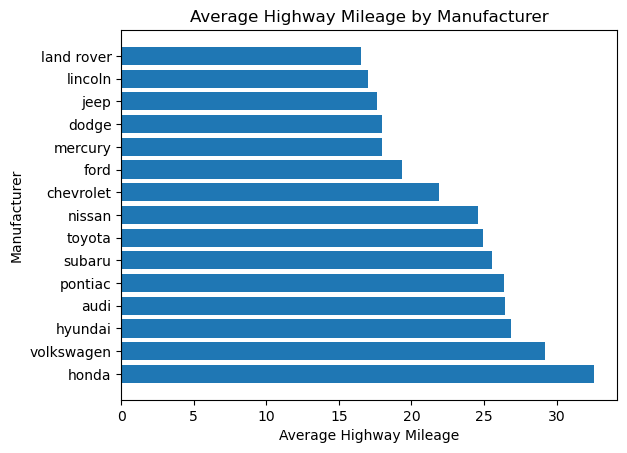

In [9]:
# bar chart with average hwy mileage by manufacturer
plt.barh(mileage_by_manufacturer.index, mileage_by_manufacturer.values)
plt.xlabel('Average Highway Mileage')
plt.ylabel('Manufacturer')
plt.title('Average Highway Mileage by Manufacturer')
plt.show()

* Which class of vehicle has the highest highway MPG on average?  (Use groupby to answer this).

In [10]:
# class of vehicle with highest highway MPG on average
highest_mpg_class = df.groupby('class')['hwy'].mean().idxmax()
print('Class of vehicle with highest highway MPG on average: ', highest_mpg_class)

Class of vehicle with highest highway MPG on average:  compact


* Create a DataFrame with car information that includes only those cars for which the manufacturer achieved an average highway MPG of 26 and above. For example, the Audi A4 will be included only on those years for which Audi had achieved a highway MPG of at least 26.

In [11]:
# car information including only cars that achieved avg hwy MPG >= 26
car_info = df.groupby(['manufacturer', 'model']).filter(lambda x: x['hwy'].mean() >= 26)
print(car_info)

    manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       

* Which vehicle has the largest engine in this dataset?  What is the most common engine displacement?

In [12]:
# engine size
largest_engine = df.sort_values('displ', ascending=False).iloc[0]
print('Largest engine: ', largest_engine['model'])

Largest engine:  corvette


In [13]:
# most common engine displacement
most_common_displacement = df['displ'].value_counts().idxmax()
print('Most common engine displacement: ', most_common_displacement)

Most common engine displacement:  2.0


## Part 2:  Analyzing annual GDP

Next, we will again look at the dataset of annual Gross Domestic Product (GDP) collected from the 1960's across the world.

In [14]:
gdp = pd.read_csv('http://cs.colostate.edu/~asa/courses/dsci235/spr21/data/worldstats.csv')
gdp.head()

,index,country,year,population,GDP
0,2271,Afghanistan,2015,32526562.0,1.919944e+10
1,2272,Afghanistan,2014,31627506.0,2.005019e+10
2,2273,Afghanistan,2013,30682500.0,2.004633e+10
3,2274,Afghanistan,2012,29726803.0,2.053654e+10
4,2275,Afghanistan,2011,28809167.0,1.793024e+10


* Using `groupby`, find the country that had the largest growth in GDP from 1990 to 2015.

In [15]:
#largest gdp from 1990 to 2015
gdp_filtered = gdp[gdp['year'].isin([1990, 2015])]
gdp_filtered = gdp_filtered.pivot(index='country', columns='year', values='GDP')
gdp_filtered['growth'] = gdp_filtered[2015] - gdp_filtered[1990]
largest_growth = gdp_filtered.sort_values('growth', ascending=False).index[0]
print('Country with largest growth in GDP from 1990 to 2015: ', largest_growth)

Country with largest growth in GDP from 1990 to 2015:  United States


### Part 3: analyzing movie ratings

Your task is to analyze movie ratings data from the [MovieLens](https://grouplens.org/datasets/movielens/) dataset.
They have multiple datasets, and our focus will be their [1M Dataset](https://grouplens.org/datasets/movielens/1m/) dataset that contains around 1 million movie ratings from 6000 users on 4000 movies.


For the following questions we will focus on two of the MovieLens data files:

"movies.dat", which describes the movies, and 

"ratings.dat" which provides the movie ratings.

The ratings file "ratings.dat" has the following format:

```
user_id::movie_id::rating::time_stamp
```

- user_id is in the range between 1 and 6040 
- movie_id is in th range between 1 and 3952
- Ratings are on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by Unix time command.

Movie information is in the file "movies.dat" and is in the following
format:

```
MovieID::Title::Genres
```

- Titles are identical to titles provided by IMDB (including year of release)
- Genres are pipe-separated.

The following commands will read the data into pandas DataFrames:


In [16]:
movies=pd.read_csv('https://www.cs.colostate.edu/~asa/courses/dsci235/spr21/data/movies.dat', sep='::', engine='python', header=None, names=['movie_id', 'title', 'genres'])

In [17]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
ratings=pd.read_csv('https://www.cs.colostate.edu/~asa/courses/dsci235/spr21/data/ratings_subset.dat', sep='::', engine='python', header=None, names=['user_id', 'movie_id', 'rating', 'time_stamp'])
ratings.head()

,user_id,movie_id,rating,time_stamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Write pandas commands that will answer the following questions:

* The ratings DataFrame identifies movies by their id.  To obtain movie ratings by name, you will need to `merge` the two DataFrames (movies and ratings).  Perform an `inner` merge.  The resulting DataFrame might have fewer rows than the original ratings DataFrame.  Explain why this is happening in this case.

In [19]:
# merge the DataFrames
merged_df = pd.merge(ratings, movies, on='movie_id', how='inner')
print(merged_df)

       user_id  movie_id  rating  time_stamp  \
0            1      1193       5   978300760   
1            1       661       3   978302109   
2            1       914       3   978301968   
3            1      3408       4   978300275   
4            1      2355       5   978824291   
...        ...       ...     ...         ...   
97615      669       585       4   975631958   
97616      669       586       3   975631958   
97617      669       587       3   975631938   
97618      669       588       4   975631606   
97619      669       589       5   975633871   

                                        title  \
0      One Flew Over the Cuckoo's Nest (1975)   
1            James and the Giant Peach (1996)   
2                         My Fair Lady (1964)   
3                      Erin Brockovich (2000)   
4                        Bug's Life, A (1998)   
...                                       ...   
97615           Brady Bunch Movie, The (1995)   
97616                       Hom

The resulting DataFrame might have fewer rows than the original ratings DataFrame. This happens because an inner merge only keeps the rows where there is a match in both dataframes.

* Which movie has received the largest number of ratings? (In this and other questions, provide titles rather than IDs!

In [20]:
# largest number of ratings
largest_rating = merged_df['title'].value_counts().idxmax()
print('Movie with largest number of ratings: ', largest_rating)

Movie with largest number of ratings:  American Beauty (1999)


* Which movie received the largest number of five star ratings?

In [21]:
# largest number of five star ratings
five_star_ratings = merged_df[merged_df['rating'] == 5]
largest_five_star = five_star_ratings['title'].value_counts().idxmax()
print('Movie with largest number of five star ratings: ', largest_five_star)

Movie with largest number of five star ratings:  American Beauty (1999)


* Which movie received the highest average rating?

In [22]:
# highest average rating
highest_average = merged_df.groupby('title')['rating'].mean().idxmax()
print('Movie with highest average rating: ', highest_average)

Movie with highest average rating:  Autumn Sonata (1978)


* In what follows we will define a movie as **highly rated** if at least 50% of its ratings are a "5".  To remove the ability of just a few raters to influence the results, for this task, only consider movies that have received at least 20 ratings.  In this question you have two tasks:
  *  Extract all highly rated movies that received at least 20 ratings.
  *  Among those movies, what is the most common genre?
 
Since pandas does not provide very good support for processing strings you may use a for loop for computing the most common genre, i.e. something like:

```Python
for genres in df['genre'] :
   # do something with genres string
```

Keep in mind that each entry in the genre column can contain multiple genres, so those need to be separated out (recommend using `str.split` for that).

In [23]:
# highly rated movies
min_ratings = 20
min_rating_percentage = 0.5

movie_ratings = merged_df.groupby('title')['rating'].agg(['count', 'mean'])
highly_rated = movie_ratings[movie_ratings['count'] >= min_ratings]
highly_rated = highly_rated[highly_rated['mean'] >= min_rating_percentage]

print('Highly rated movies: ')
print(highly_rated)

Highly rated movies: 
                                   count      mean
title                                             
'burbs, The (1989)                    32  3.031250
...And Justice for All (1979)         20  4.050000
10 Things I Hate About You (1999)     77  3.584416
101 Dalmatians (1961)                 58  3.741379
101 Dalmatians (1996)                 32  3.187500
...                                  ...       ...
Young Guns (1988)                     58  3.465517
Young Guns II (1990)                  35  3.171429
Young Sherlock Holmes (1985)          30  3.433333
Zero Effect (1998)                    26  3.961538
eXistenZ (1999)                       38  3.052632

[1346 rows x 2 columns]


In [24]:
# most common genre among highly rated movies
genre_counts = {}

# Iterate over the titles of highly rated movies
for genres in highly_rated.index:
    # Get the genres of the current movie
    movie_genres = movies[movies['title'] == genres]['genres'].values[0]
    
    # Split the genres by '|' and count them
    for genre in movie_genres.split('|'):
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Find the most common genre
most_common_genre = max(genre_counts, key=genre_counts.get)
print('Most common genre among highly rated movies: ', most_common_genre)


Most common genre among highly rated movies:  Comedy


### Submission

Submit your assignment as a Jupyter notebook via Canvas.  

### Grading 

Grading sheet for assignment 3

```
pandas:  car mileage (50 pts)
  compact cars (10 pts)
  audi a4 (10 pts)
  hwy mileage by manufacturer (10 pts)
  average hwy mileage by manufacturer (10 pts)
  engine size (10 pts)

Analyzing GDP (10 pts)

Analyzing movie rating data (40 pts)
  merge dataframes (10 pts)
  movie with largest number of ratings (10 pts)
  movie with highest average rating (10 pts)
  highly rated movies:
    extracting them (5 pts)
    most common genre among highly rated movies (5 pts)
  
```

Throughout the course, use of for loops is discouraged.  **Points will be taken off for using for loops unless explicitly allowed.**  pandas /NumPy provide tools for accomplishing things without the need for Python loops.